In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

data_dir = os.path.abspath("../Database/data")
print("Dataset directory:", data_dir)
print("Classes found:", os.listdir(data_dir))

img_height, img_width = 224, 224
batch_size = 32
initial_epochs = 10 
fine_tune_epochs = 10 

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False 
)

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history_initial = model.fit(
    train_generator,
    epochs=initial_epochs,
    validation_data=validation_generator
)

for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine = model.fit(
    train_generator,
    epochs=initial_epochs + fine_tune_epochs,
    initial_epoch=initial_epochs,
    validation_data=validation_generator
)


Dataset directory: C:\Users\shashavali\Downloads\AI PROJECT\Database\data
Classes found: ['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry', 'Drumstick', 'Fenugreek', 'Guava', 'Hibiscus', 'Indian_Beech', 'Indian_Mustard', 'Jackfruit', 'Jamaica_Cherry-Gasagase', 'Jamun', 'Jasmine', 'Karanda', 'Lemon', 'Mango', 'Mexican_Mint', 'Mint', 'Neem', 'Oleander', 'Parijata', 'Peepal', 'Pomegranate', 'Rasna', 'Rose_apple', 'Roxburgh_fig', 'Sandalwood', 'Tulsi']
Found 11504 images belonging to 30 classes.
Found 2876 images belonging to 30 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,259,614 (12.43 MB)

 Trainable params: 30,750 (120.12 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

C:\Users\shashavali\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.4966 - loss: 1.8647 - val_accuracy: 0.9447 - val_loss: 0.2681
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.9327 - loss: 0.2643 - val_accuracy: 0.9569 - val_loss: 0.1714
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.9594 - loss: 0.1586 - val_accuracy: 0.9701 - val_loss: 0.1237
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - accuracy: 0.9732 - loss: 0.1098 - val_accuracy: 0.9736 - val_loss: 0.1070
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.9761 - loss: 0.0933 - val_accuracy: 0.9753 - val_loss: 0.1014
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.9774 - loss: 0.0825 - val_accuracy: 0.9750 - val_loss: 0.0925
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 334s 927ms/step - accuracy: 0.9783 - loss: 0.0750 - val_accuracy: 0.9711 - val_loss: 0.0964
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 333s 924ms/step - accuracy: 0.9799 - loss: 0.0742 - va

In [2]:
from sklearn.metrics import classification_report

val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"\nValidation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

validation_generator.reset()
steps = int(np.ceil(validation_generator.samples / batch_size))
predictions_val = model.predict(validation_generator, steps=steps)
predicted_classes = np.argmax(predictions_val, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))




90/90 ━━━━━━━━━━━━━━━━━━━━ 64s 713ms/step - accuracy: 0.9758 - loss: 0.1022

Validation Loss: 0.0749, Validation Accuracy: 0.9833
90/90 ━━━━━━━━━━━━━━━━━━━━ 65s 713ms/step

Classification Report:
                         precision    recall  f1-score   support

            Arive-Dantu       1.00      0.98      0.99       100
                 Basale       1.00      0.91      0.95       100
                  Betel       0.91      1.00      0.96        96
          Crape_Jasmine       1.00      1.00      1.00       100
                  Curry       0.98      0.98      0.98       100
              Drumstick       0.85      0.95      0.90       100
              Fenugreek       0.93      0.86      0.89        72
                  Guava       1.00      1.00      1.00       100
               Hibiscus       1.00      1.00      1.00        86
           Indian_Beech       1.00      1.00      1.00       100
         Indian_Mustard       1.00      1.00      1.00        68
              Jackfruit

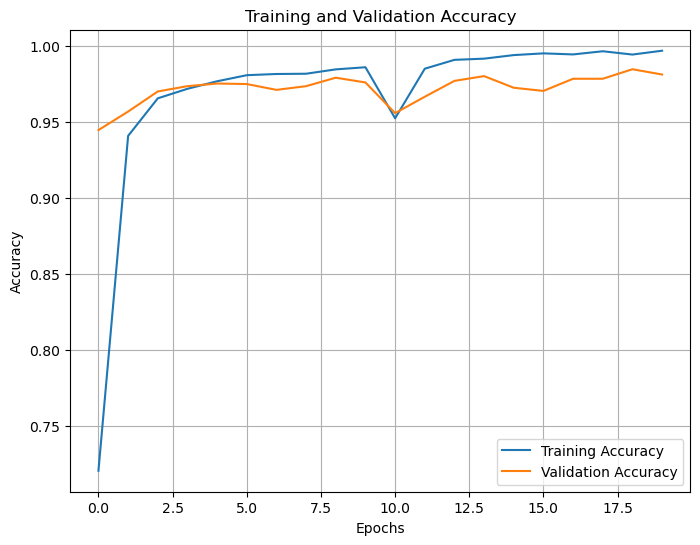

In [3]:
import matplotlib.pyplot as plt
epochs_total = initial_epochs + fine_tune_epochs
epochs_range = range(epochs_total)
acc = history_initial.history['accuracy'] + history_fine.history['accuracy']
val_acc = history_initial.history['val_accuracy'] + history_fine.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import os
import tensorflow as tf

models_dir = os.path.abspath(os.path.join(os.getcwd(), "Models"))
os.makedirs(models_dir, exist_ok=True)

# Define save path
model_save_path = os.path.join(models_dir, "medicinal_plant_model.keras")

# Save the model
model.save(model_save_path)

# Confirm save
if os.path.exists(model_save_path):
    print("✅ Model saved successfully at:", model_save_path)
else:
    print("❌ Model NOT saved. Check directory permissions or path.")


✅ Model saved successfully at: C:\Users\shashavali\Downloads\AI PROJECT\Notebooks\Models\medicinal_plant_model.keras


Test directory: C:\Users\shashavali\Downloads\AI PROJECT\Sample_Test
Loaded model from: C:\Users\shashavali\Downloads\AI PROJECT\Models\medicinal_plant_model.keras
Found 30 classes: ['Arive-Dantu', 'Basale', 'Betel', 'Crape_Jasmine', 'Curry'] ...
Class mapping loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


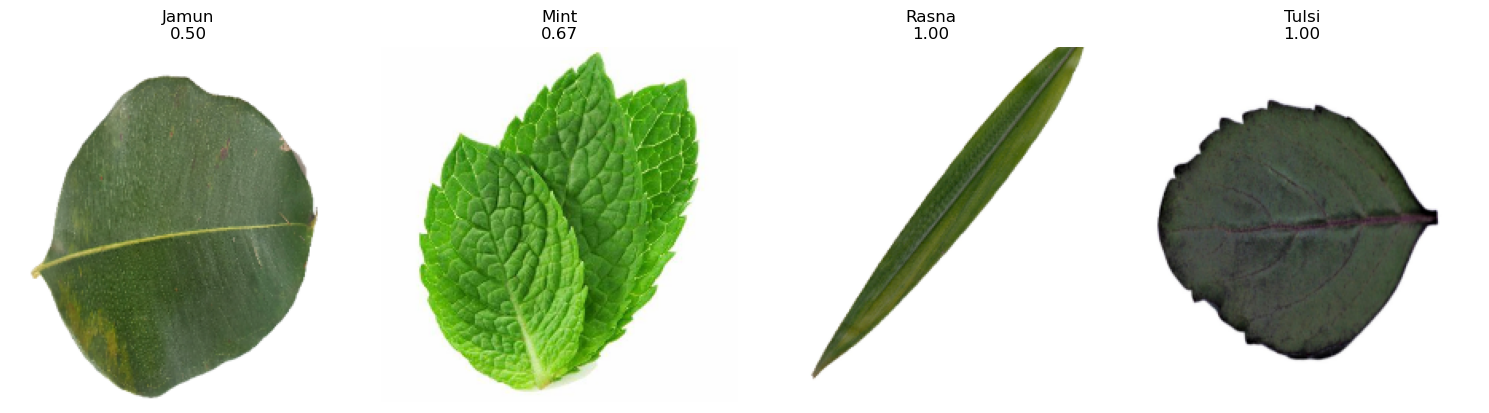

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# -------------------------------
# 📂 Test directory and model path
# -------------------------------
test_dir = r"C:\Users\shashavali\Downloads\AI PROJECT\Sample_Test"
print("Test directory:", test_dir)

image_extensions = ['.png', '.jpg', '.jpeg']
test_files = [f for f in os.listdir(test_dir) if os.path.splitext(f)[1].lower() in image_extensions]
test_files = test_files[:5]  # show only first 5 images for quick test

model_path = r"C:\Users\shashavali\Downloads\AI PROJECT\Models\medicinal_plant_model.keras"
model = load_model(model_path)
print("Loaded model from:", model_path)

# -------------------------------
# 🧩 Class mapping fix (no train_generator needed)
# -------------------------------
train_dir = r"C:\Users\shashavali\Downloads\AI PROJECT\Database\data"

# Get class names (folder names)
class_names = sorted(os.listdir(train_dir))
print(f"Found {len(class_names)} classes:", class_names[:5], "...")  # show first 5 for verification

# Create mapping: index → class name
inv_class_indices = {i: name for i, name in enumerate(class_names)}
print("Class mapping loaded successfully!")

# -------------------------------
# 🧠 Image prediction loop
# -------------------------------
img_width, img_height = 224, 224
plt.figure(figsize=(15, 5))

for i, filename in enumerate(test_files):
    file_path = os.path.join(test_dir, filename)
    test_img = cv2.imread(file_path)
    if test_img is None:
        print("⚠️ Error: Test image not found at", file_path)
        continue

    # Preprocess image
    test_img_resized = cv2.resize(test_img, (img_width, img_height))
    test_img_norm = test_img_resized.astype("float32") / 255.0
    test_img_expanded = np.expand_dims(test_img_norm, axis=0)

    # Predict
    pred = model.predict(test_img_expanded)
    pred_class_idx = np.argmax(pred, axis=1)[0]
    confidence = np.max(pred)

    predicted_label = inv_class_indices[pred_class_idx]

    # Convert image for display
    test_img_rgb = cv2.cvtColor(test_img_resized, cv2.COLOR_BGR2RGB)

    # Plot result
    plt.subplot(1, len(test_files), i + 1)
    plt.imshow(test_img_rgb)
    plt.axis('off')
    plt.title(f"{predicted_label}\n{confidence:.2f}")

plt.tight_layout()
plt.show()
